In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

import flock_measures as flock

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [2]:
location = 'Cape_Hatteras'
member = 50
std = 0.01

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/std_{std*100:03.0f}/{location}_std{std*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)

In [3]:
lons = pset['lon'][:100, :600].values
lats = pset['lat'][:100, :600].values

CM_lons, CM_lats = flock.center_of_mass_displacement(lons, lats)
CM_lons += np.mean(lons[:,0])
CM_lats += np.mean(lats[:,0])

sigma_lons, sigma_lats = flock.center_of_mass_spread(lons, lats)

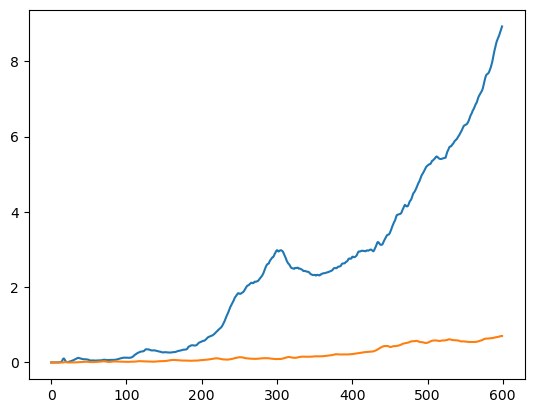

In [4]:
plt.plot(sigma_lons)
plt.plot(sigma_lats)

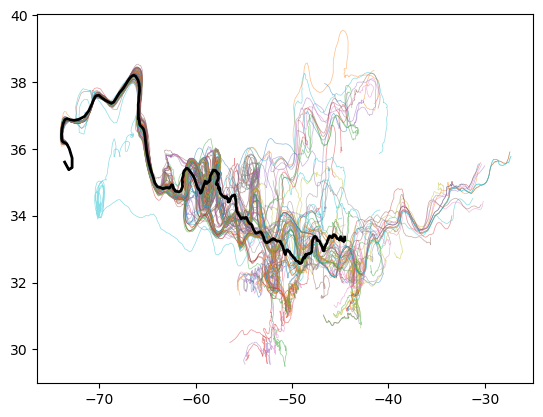

In [5]:
for i in range(100):
    plt.plot(lons[i,:], lats[i,:], lw=0.5, alpha=0.5)

plt.plot(CM_lons, CM_lats, 'k', lw=2)

In [6]:
D, D_mean, D_std = flock.relative_dispersion(lons, lats, CM_lons, CM_lats)

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


(array([0.00092352, 0.        , 0.        , 0.        , 0.00184704,
        0.00092352, 0.00092352, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00092352, 0.00184704, 0.00092352,
        0.        , 0.        , 0.        , 0.00092352, 0.00461759,
        0.        , 0.00277055, 0.00277055, 0.00277055, 0.00184704,
        0.00554111, 0.00184704, 0.00184704, 0.00369407, 0.00461759,
        0.00092352, 0.00092352, 0.00092352, 0.        , 0.00184704,
        0.00277055, 0.00092352, 0.00092352, 0.        , 0.00369407,
        0.00369407, 0.        , 0.00092352, 0.00184704, 0.00092352,
        0.        , 0.        , 0.00092352, 0.00092352, 0.        ,
        0.00184704, 0.        , 0.00092352, 0.        , 0.00184704,
        0.        , 0.        , 0.        , 0.00184704, 0.00092352,
        0.00092352, 0.00184704, 0.00184704, 0.00092352, 0.00092352,
        0.00092352, 0.        , 0.        , 0.        , 0.        ,
        0.00092352, 0.00092352, 0.00092352, 0.  

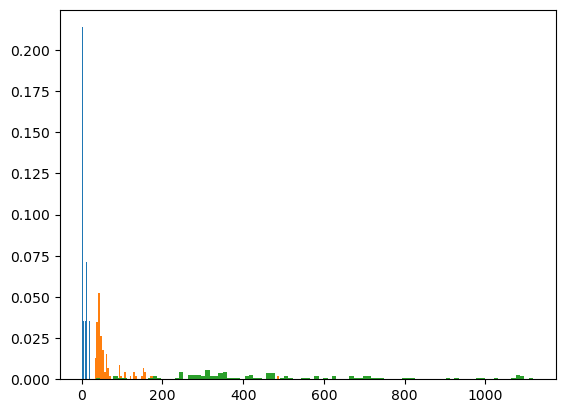

In [21]:
plt.hist(D[:, 10]/1000, bins=100, density=True)
plt.hist(D[:, 100]/1000, bins=100, density=True)
plt.hist(D[:, 500]/1000, bins=100, density=True)

Text(0, 0.5, 'Mean Displacement from Center of Mass [km]')

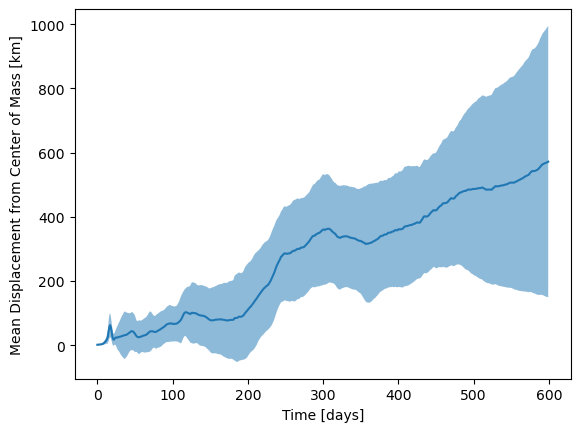

In [20]:
plt.plot(D_mean/1000)
plt.fill_between(np.arange(600), (D_mean-D_std)/1000, (D_mean+D_std)/1000, alpha=0.5)
plt.xlabel('Time [days]')
plt.ylabel('Mean Displacement from Center of Mass [km]')
